In [1]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
from keras.utils.vis_utils import plot_model
from numpy.random import seed


In [2]:
# load the dataset
dataset = loadtxt('Destriex_matched_regressed_out_nn.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:744]
Y = dataset[:,744]

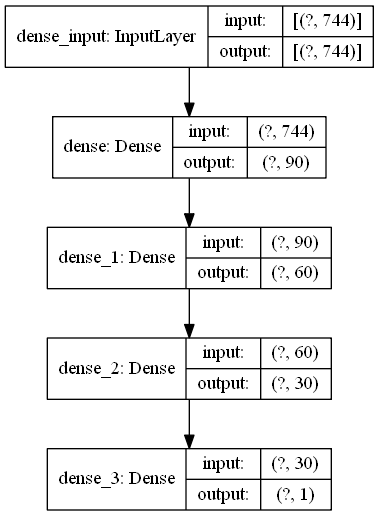

In [3]:

# define the keras model
model = Sequential()
model.add(Dense(90, input_dim=744, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Show structure of model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [4]:
seed(1)
# fit the keras model on the dataset
history = model.fit(X, Y, validation_split=0.33, epochs=20, batch_size=50, verbose=0)

In [5]:
# make class predictions with the model
predictions = model.predict_classes(X)
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], Y[i]))
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[-1.31936747, 1.120064453, 0.486499187, -1.163009301, -1.122286839, -0.850036113, -1.473635801, -0.528531407, -0.911063265, -0.454782621, 1.499645088, -0.597781455, -0.536235328, -1.248143423, -1.196809947, -1.411565642, -0.951140553, -0.466327433, -0.249097936, 0.229717097, -0.086498849, 1.447407852, -0.543686592, -1.141364996, -1.360368871, -0.641472459, -0.033071455, 0.070337269, -0.691645236, 1.151711949, -0.842310218, -1.580304543, -1.172155071, -1.22714801, -0.603668324, -1.141441641, -0.659500451, -1.074695088, -0.677366744, 0.083636781, -0.631198197, 1.683384055, -1.128475137, 1.18393057, 0.042654819, 0.517035883, -0.517272716, -0.904444865, -1.42131

4/4 [==============================] - 0s 751us/step - loss: 0.3172 - accuracy: 0.8649
Accuracy: 86.49


In [6]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


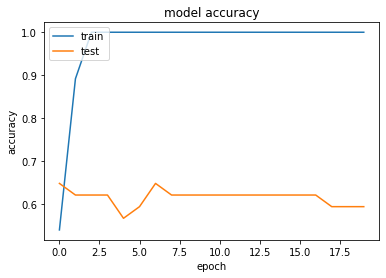

In [7]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

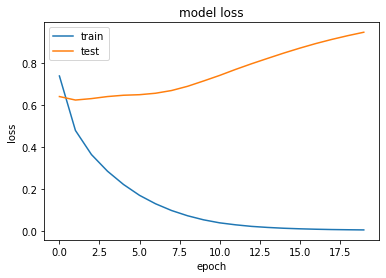

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()